In [1]:
import requests
import re
from bs4 import BeautifulSoup
import time
import selenium
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException        
from selenium.common.exceptions import StaleElementReferenceException  
from datetime import datetime      
from urllib.parse import urlencode
from constants import Constant

# Set headers
headers = requests.utils.default_headers()
headers.update(
    {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

params = {
    'category': Constant.category["DEFAULT"],
    'condition': [
        Constant.condition["NEW"],
        Constant.condition["USED"],
        Constant.condition["DEMO"]
        ],
    'priceMax': "",
    'priceMin': "",
    'tachometrMax': "",
    'yearMax': "",
    'yearMin': "",
    'manufacturer': Constant.manufacturer["BMW"],
    'model': Constant.model["BMW_M3"]
}

urls = [
    'https://www.sauto.cz/osobni/hledani#!' + urlencode(params, doseq=True)
]

driver = webdriver.Chrome()

def render_page(url):
    driver.get(url)
    time.sleep(3)
    r = driver.page_source
    return r

def return_int(value):
    return int(value.replace(" ", ""))

def get_date_time():
    now = datetime.now()
    return now.strftime("%Y-%m-%d %H:%M:%S")

r = render_page(urls[0])

soup = BeautifulSoup(r, "html.parser")

average = 0
value = ""
price = 0
sum_total = 0
items_total = 0
price_list_total = 0
manufacturer_list_total = []
model_list_total = []
mileage_list_total = []
year_manufactured_list_total = []
datetime_list_total = []

def scrape():
    sum = 0
    items = 0
    price_list = []
    manufacturer_list = []
    model_list = []
    mileage_list = []
    year_manufactured_list = []
    datetime_list = []
    for i in soup.select('.price strong:not(#pvContent .price strong)'):
        sum += return_int(i.text)
        manufacturer = driver.find_elements_by_css_selector(".carBoxContent h1")[0].text
        manufacturer_list.insert(items, manufacturer)
        model = driver.find_element_by_css_selector(".modelBox h1").text
        model_list.insert(items, model)
        yearManufactured = driver.find_elements_by_css_selector(".content dl")[items].find_elements_by_css_selector("dd")[1].text
        year_manufactured_list.insert(items, return_int(yearManufactured))
        mileage = driver.find_elements_by_css_selector(".content dl")[items].find_elements_by_css_selector("dd")[2].text
        mileage_list.insert(items, return_int(re.sub("[^\\d]", "", mileage)))
        datetime = get_date_time()
        datetime_list.insert(items, datetime)
        price_list.insert(items, return_int(i.text))
        items += 1
    result = (sum, items, price_list, manufacturer_list, model_list, mileage_list, year_manufactured_list, datetime_list)     
    return result

tuple = scrape()
sum_total = tuple[0]
items_total = tuple[1]
price_list_total = tuple[2]
manufacturer_list_total = tuple[3]
model_list_total = tuple[4]
mileage_list_total = tuple[5]
year_manufactured_list_total = tuple[6]
datetime_list_total = tuple[7]

def check_exists_by_cssSelector(css):
    try:
        driver.find_element_by_css_selector(css)
    except NoSuchElementException:
        return False
    except StaleElementReferenceException:
        return False
    return True

element_string = "#nextPage"

while check_exists_by_cssSelector(element_string):
    driver.find_element_by_css_selector(element_string).click()
    time.sleep(3)
    r = render_page(driver.current_url)
    soup = BeautifulSoup(r, "html.parser")
    tuple = scrape()
    sum_total += tuple[0]
    items_total += tuple[1]
    price_list_total += tuple[2]
    manufacturer_list_total += tuple[3]
    model_list_total += tuple[4]
    mileage_list_total += tuple[5]
    year_manufactured_list_total += tuple[6]
    datetime_list_total += tuple[7]

driver.quit()

average = sum_total / items_total

print("Items: " + str(items_total))
print("Min: " + str(min(price_list_total)))
print("Max: " + str(max(price_list_total)))
print("Average: " + str(average))
if average > 100000:
  print("Nikdy na to nebudes mit prachy voe")
else:
    print("Tak na tenhle vrak mas!")

Items: 25
Min: 479999
Max: 3350000
Average: 1249715.08
Nikdy na to nebudes mit prachy voe


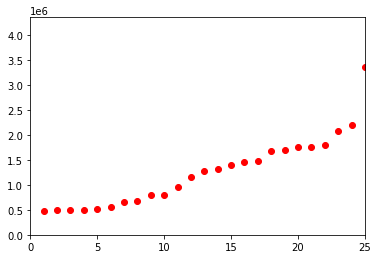

In [3]:
items_list_by_index = []
for (i, item) in enumerate(price_list_total, start=1):
    items_list_by_index.append(i)

plt.plot(items_list_by_index, price_list_total, 'ro')
plt.axis([0, items_total, 0, max(price_list_total) + 1000000])
plt.show()

In [4]:
import pandas as pd

data = {'manufacturer': manufacturer_list_total,
        'model': model_list_total,
        'price': price_list_total,
        'mileage': mileage_list_total,
        'year_manufactured': year_manufactured_list_total,
        'snaptime': datetime_list_total}

df = pd.DataFrame(data)

print(df)

manufacturer model    price  mileage  year_manufactured  \
0           BMW    M3   479999    36291               2016   
1           BMW    M3   495000   173542               2003   
2           BMW    M3   498000   209000               2002   
3           BMW    M3   504000   216700               2002   
4           BMW    M3   519990   189375               2003   
5           BMW    M3   550000   200000               1998   
6           BMW    M3   649900   133000               1997   
7           BMW    M3   670000   129050               2007   
8           BMW    M3   786500   181000               2009   
9           BMW    M3   799000   112933               2010   
10          BMW    M3   950000   154295               2010   
11          BMW    M3  1150000   123580               2015   
12          BMW    M3  1269000    49500               2014   
13          BMW    M3  1319000    92500               2014   
14          BMW    M3  1399000    20040               2015   
15         